## **Análise de Dados, ENEM**

*   *O que podemos tirar dos Dados do ENEM?*

Vamos explorar os dados do ENEM de 2019, onde foi considerado um enem "normal" levando em consideração a pandemia nos anos seguintes. Esses dados contém informações sobre performance dos alunos e iremos extrair alguns insights para que a Secretária de Educação possa agir e aconselhar as escolas na metodologia ou no foco do ensino.

A planilha possui as seguintes colunas:


| Coluna | Descrição |
|  ----  |  -------  |
|Inscricao (Inscrição)| É número de registro da inscrição do aluno no ENEM.|
|Idade (Idade)        | É a idade do inscrito em 2019.
|Sexo (Sexo)	        | É a categoria de sexo do inscrito, sendo M para Masculino e F para Feminino
|Conclusao_ens_med (Status de Conclusão do Ensino médio)|	É a categoria informando se o aluno está cursando, já concluiu ou não completou o Ensino médio. Temos os status Concluído, Cursando, Outros.
|Tipo_ens_med (Tipo de Ensino Médio) |	Qual o tipo de ensino médio cursado, sendo 1=”Sem Resposta”, 2=”Pública”, 3=”Privada”, 4=”Exterior”
|Treineiro (Treineiro) |	Se a pessoa está fazendo a prova para Valer ou é apenas um teste. 1 para Sim e 0 para não.
|Cadeira_canhoto (A pessoa pediu uma cadeira Canhota)|	Se a pessoa pediu ou não uma cadeira para canhoto. 1 para Sim e 0 para Não.
|Gestante (A pessoa é Gestante) |	Se a pessoa é gestante ou não. 1 para Sim e 0 para Não.
|Idoso (Idoso)|	Se a pessoa é idoso ou não (inscritos com mais de 60 anos). 1 para Sim e 0 para Não.
|Celular_na_residencia (Há celular na residência onde mora)|	Se há pelo menos 1 aparelho celular na residência do Inscrito ou não. 1 para Sim e 0 para Não.
|Internet_na_residencia (Há internet na residência onde mora)|	Se há alguma forma de acesso à acesso a na residência do Inscrito ou não. 1 para Sim e 0 para Não.
|Pessoas_na_residencia (Pessoas na Residência)|	Número de pessoas que vive na Residência do inscrito.
|Renda_mensal_familiar (Renda Mensal Familiar)|	Faixa de renda familiar em que
|nota_ct|	Nota referente a Ciências da natureza e suas tecnologias.
|nota_ch|	Nota referente a Ciências humanas e suas tecnologias.
|nota_lc|	Nota referente a Linguagens, códigos e suas tecnologias.
|nota_mt|	Nota referente a Matemática e suas tecnologias.
|nota_redacao|	Nota referente a redação.

## **Bibliotecas de Auxílio**

Para trabalhar com os dados, o python nos disponibiliza algumas ferramentas muito úteis:

[Pandas](https://pandas.pydata.org/): Uma biblioteca que vai trabalhar com leitura/ tratamento e manipulação de dados, em geral de forma tabular ou sequencial (listas ou tabelas)

[Numpy](https://numpy.org/doc/): Uma biblioteca de computação científica, vai nos ajudar a manipular, vetores, matrizes e fazer operações matemáticas em cima de dados.

[Matplotlib](https://matplotlib.org/): O Matplotlib é uma biblioteca que nos ajuda a montar visualizações gráficas de dados.

[Seaborn](https://seaborn.pydata.org/): O Seaborn É uma camada adicional para o Matplotlib, para podermos criar gráficos mais complexos e bonitos.

[Warnings](https://docs.python.org/pt-br/3/library/warnings.html): é apenas uma biblioteca para nos removermos os warnings de execução (para não poluir nosso estudo)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# **Configurações**

Após importar as bibliotecas temos que configurar algumas coisas.
*   Vamos igonorar os warnings de execução para deixar nosso estudo limpo


In [2]:
warnings.filterwarnings("ignore")

*   Configurando o tamanho dos gráficos do MatplotLib

In [3]:
plt.rcParams['figure.figsize'] = (17, 10) # Tamanho das figuras em Polegadas 
plt.rcParams['axes.titlepad'] = 30 # Padding do Título 

*   Escolhendo um schema de cores mais bonito para o seaborn

In [4]:
sns.set_palette("Accent") # Paleta de Cores 
sns.set_style("whitegrid") # Estilo de gráficos
sns.set(font_scale=1.5) # Configurando o tamanho da fonte 

*   Configurando a exibição de valores numericos do pandas 


In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Formatando para  1000000.00 por exemplo 

# **Leitura dos dados**

O primeiro passo da nossa análise vai ser ler a planilha com os dados do enem de 2019 com o python. Para isso vamos usar o read_csv, do pandas, que vai ler os dados e nos retornar uma tabela:

In [6]:
base_enem = pd.read_csv('C:/Users/rhfariasn/Desktop/Aula 10 exercício/ativida10/enem_2019.csv')
base_enem

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,1,0,0,0,0,1,...,7,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807
1,2,16,F,Cursando,1,1,0,0,0,1,...,5,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,3,0,0,0,0,1,...,3,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,2,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,1,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,1,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408
5095267,5095268,18,F,Concluído,1,0,0,0,0,1,...,5,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806
5095268,5095269,16,M,Cursando,1,1,0,0,0,1,...,6,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408


Vamos ver qual é o formato da nossa tabela, isto é, quantas linhas e colunas temos. Para isso podemos apenas chamar a propriedade shape da nossa base

In [7]:
base_enem.shape

(5095270, 21)

Temos 5.095.270 inscrições, sendo que cada inscrição é uma pessoa distinta, que desejava ou de fato fez ENEM 2019. E sobre cada uma dessas inscrições temos 21 colunas de informações disponíveis.

E quais são as colunas na tabela? Podemos descobrir chamando a propriedade columns

In [8]:
base_enem.columns

Index(['inscricao', 'idade', 'sexo', 'conclusao_ens_med', 'tipo_ens_med',
       'treineiro', 'cadeira_canhoto', 'gestante', 'idoso',
       'celular_na_residencia', 'internet_na_residencia',
       'pessoas_na_residencia', 'renda_mensal_familiar', 'nota_ct', 'nota_ch',
       'nota_lc', 'nota_mt', 'nota_redacao', 'estado', 'municipio',
       'municipio_id'],
      dtype='object')

Antes vamos mostrar coisas interessantes sobre o pandas. Ele nos possibilita trabalhar de forma simples com as colunas ou apenas uma coluna. Vamos se dizer que queremos pegar todos os registros de inscritos na tabela:

In [9]:
base_enem.inscricao

0                1
1                2
2                3
3                4
4                5
            ...   
5095265    5095266
5095266    5095267
5095267    5095268
5095268    5095269
5095269    5095270
Name: inscricao, Length: 5095270, dtype: int64

Ou podemos também usar:

In [10]:
base_enem['inscricao']

0                1
1                2
2                3
3                4
4                5
            ...   
5095265    5095266
5095266    5095267
5095267    5095268
5095268    5095269
5095269    5095270
Name: inscricao, Length: 5095270, dtype: int64

E se quisermos pegar mais de uma coluna, podemos fazer um recorte na tabela usando duplos couchetes:

In [11]:
base_enem[['inscricao', 'idade']]

,inscricao,idade
0,1,21
1,2,16
2,3,18
3,4,23
4,5,23
...,...,...
5095265,5095266,28
5095266,5095267,25
5095267,5095268,18
5095268,5095269,16


Além disso, é super simples criar uma nova coluna:

In [12]:
base_enem['nova_coluna'] = 100
base_enem

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id,nova_coluna
0,1,21,M,Concluído,1,0,0,0,0,1,...,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807,100
1,2,16,F,Cursando,1,1,0,0,0,1,...,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059,100
2,3,18,F,Cursando,3,0,0,0,0,1,...,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502,100
3,4,23,M,Cursando,2,0,0,0,0,1,...,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706,100
4,5,23,M,Concluído,1,0,0,0,0,1,...,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,1,0,0,0,0,1,...,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604,100
5095266,5095267,25,M,Concluído,1,0,0,0,0,1,...,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408,100
5095267,5095268,18,F,Concluído,1,0,0,0,0,1,...,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806,100
5095268,5095269,16,M,Cursando,1,1,0,0,0,1,...,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408,100


E também é tranquilo apagá-la:

In [13]:
del base_enem['nova_coluna']
base_enem

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,1,0,0,0,0,1,...,7,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807
1,2,16,F,Cursando,1,1,0,0,0,1,...,5,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,3,0,0,0,0,1,...,3,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,2,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,1,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,1,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408
5095267,5095268,18,F,Concluído,1,0,0,0,0,1,...,5,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806
5095268,5095269,16,M,Cursando,1,1,0,0,0,1,...,6,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408


# Análise Exploratória

Existe uma forma de resumir todas as informações que estão presentes dentro de um conjunto de dados, é o método describe () do pandas.

Com ele, vamos ter as informações de quase todas as colunas: quantidade, média, desvio padrão, mínimo, máximo, e os quantis.

In [14]:
base_enem.describe()

,inscricao,idade,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,pessoas_na_residencia,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,municipio_id
count,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,5095270.00,3710433.00,3923145.00,3923145.00,3710433.00,3923144.00,5095270.00
mean,2547635.50,22.09,1.33,0.12,0.00,0.00,0.00,0.98,3.87,477.82,507.25,520.52,523.12,571.19,3086472.47
std,1470877.90,7.45,0.55,0.33,0.00,0.02,0.01,0.14,1.48,76.10,82.41,64.15,109.06,188.76,997360.42
min,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1100015.00
25%,1273818.25,18.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,417.80,447.90,483.50,435.10,480.00,2405108.00
50%,2547635.50,19.00,1.00,0.00,0.00,0.00,0.00,1.00,4.00,470.30,510.60,526.20,501.10,580.00,3124203.00
75%,3821452.75,24.00,2.00,0.00,0.00,0.00,0.00,1.00,5.00,533.20,566.60,565.30,597.80,680.00,3549904.00
max,5095270.00,94.00,3.00,1.00,1.00,1.00,1.00,1.00,20.00,860.90,835.10,801.70,985.50,1000.00,5300108.00


Aqui conseguimos ter uma mini tabela que apresenta uma descrição dos dados que temos, vamos olhar para a informação da idade por enquanto:

Temos 5.095.270 registros de idade, uma média de 22.09 e um desvio padrão (variação) de 7.45 anos em torno da média. A menor idade registrada é 1 ano ( alguém tentando enganar o sistema eheheh) e a maior idade registrada é 94 anos.

O método Describe realmente nos ajuda a ter uma clareza dos dados que temos.

Vimos que 25% da base, tem menos que 18 anos. Pensando de forma inversa olhando os 25% de cima, vemos que 25% da base tem mais que 24 anos.

E se pensarmos na parcela que está entre os 25% e os 75%, podemos entender que 50% dos inscritos do ENEM 2019 tem entre 18 e 24 anos.

Outra forma de olhar para essa mesma informação é por meio de uma visualização chamada Boxplot

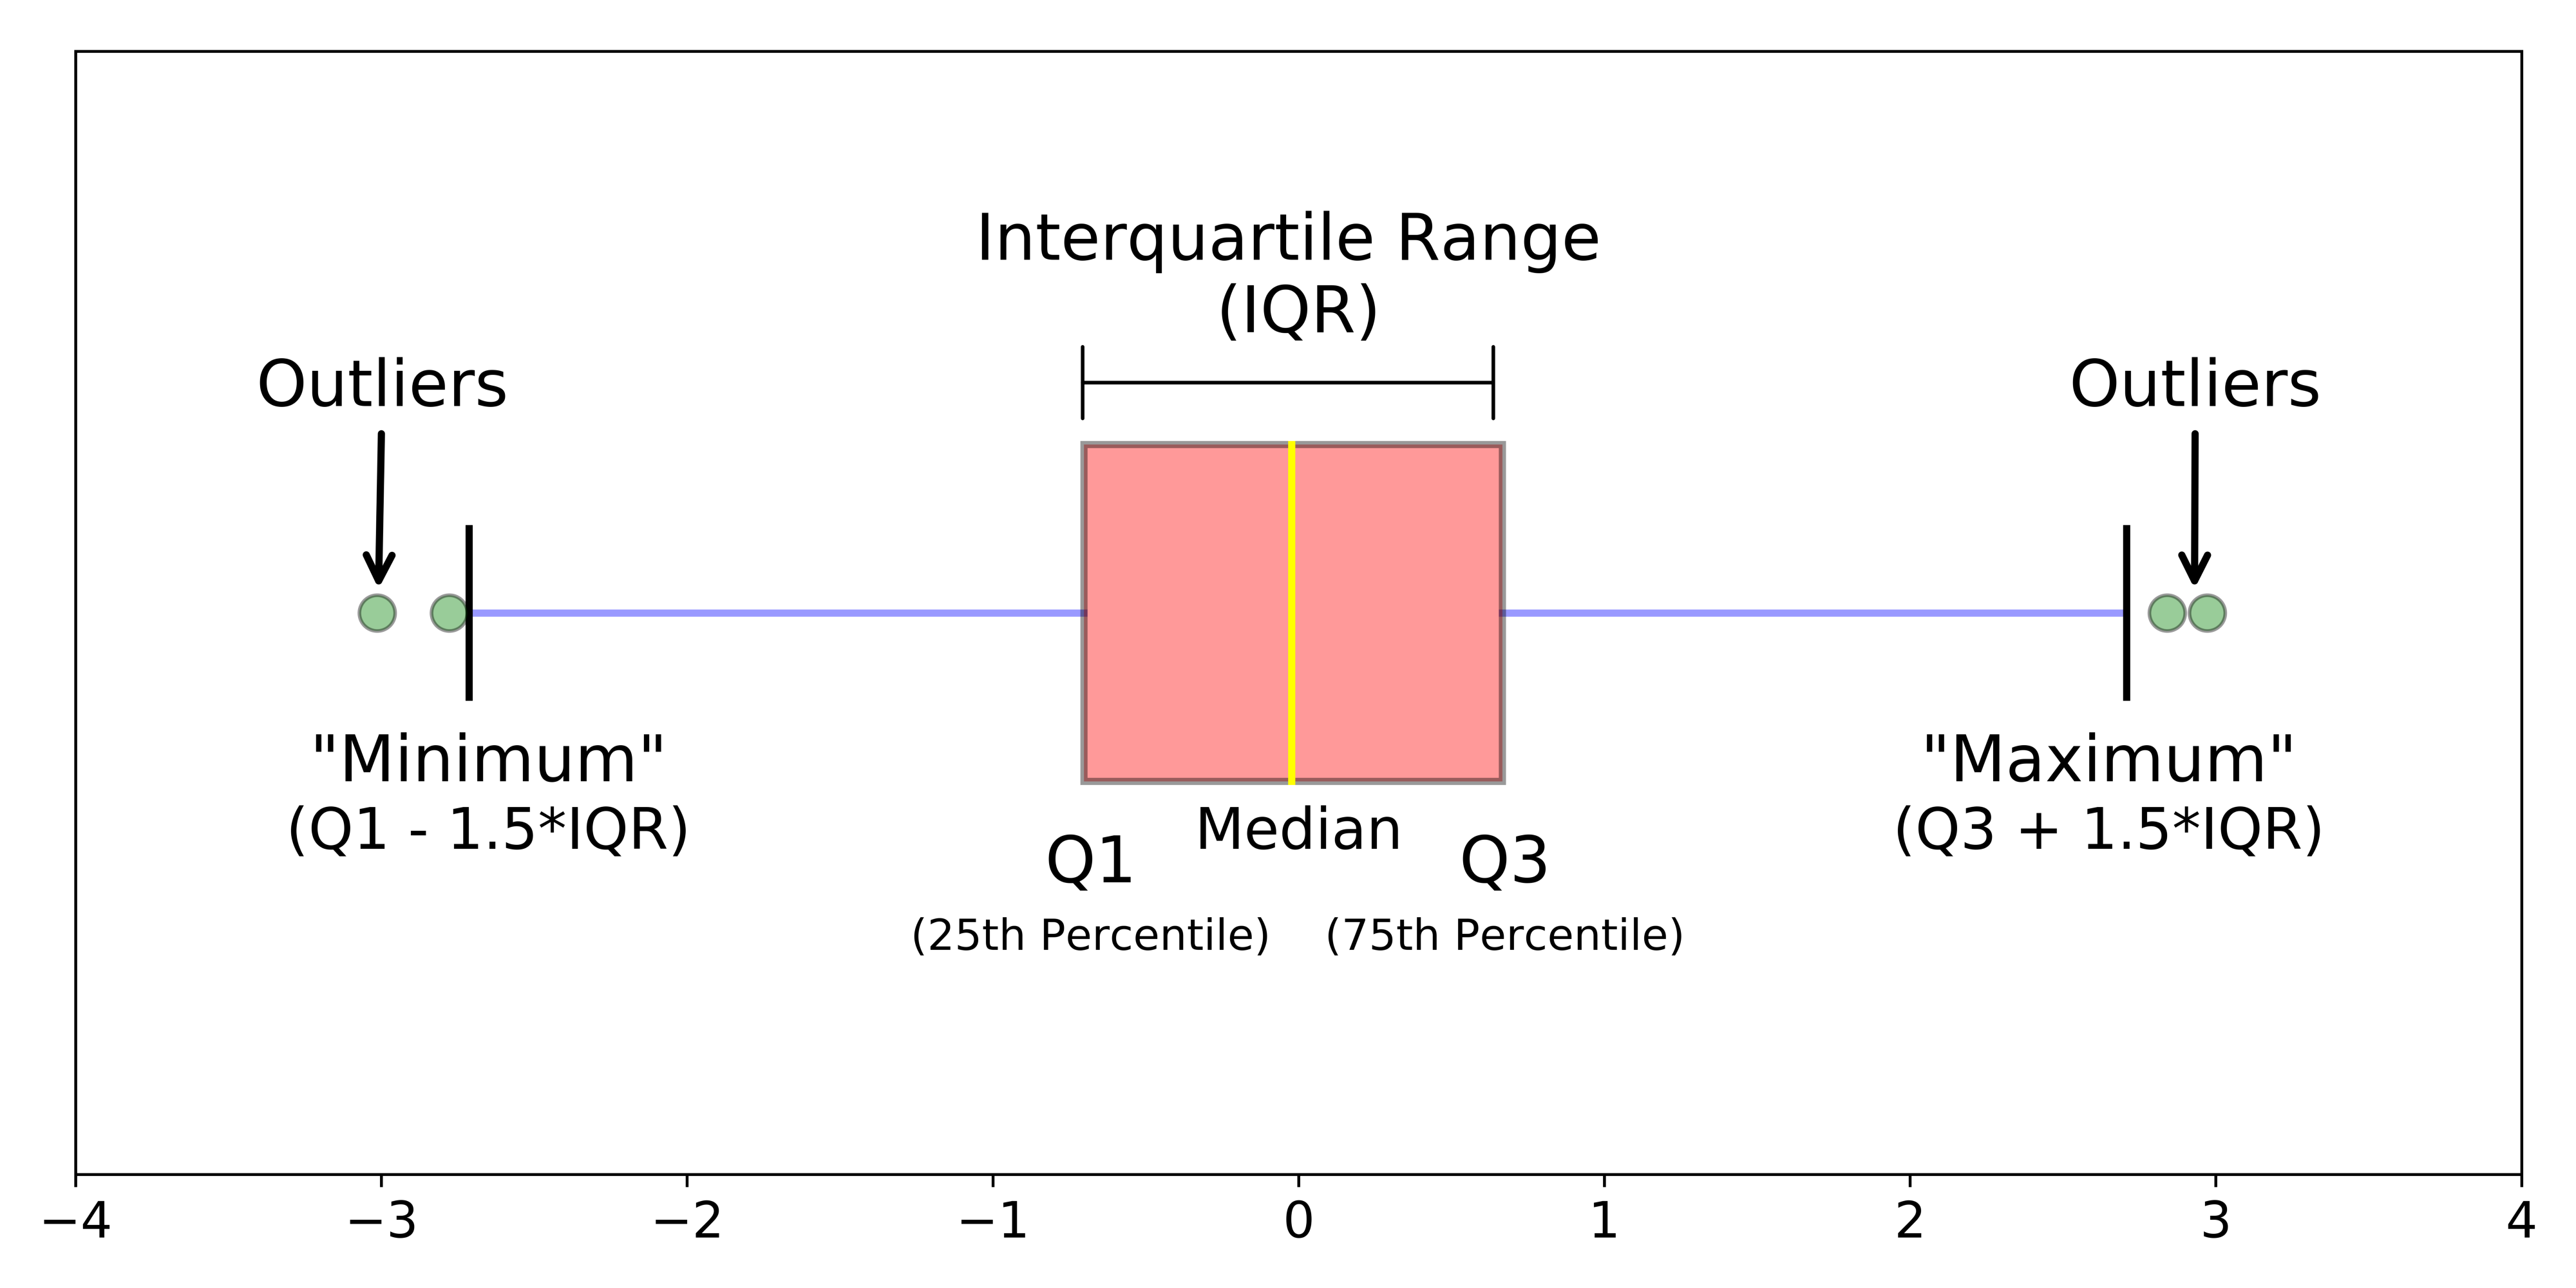

Vamos usar o Boxplot para visualizar os dados de idade:

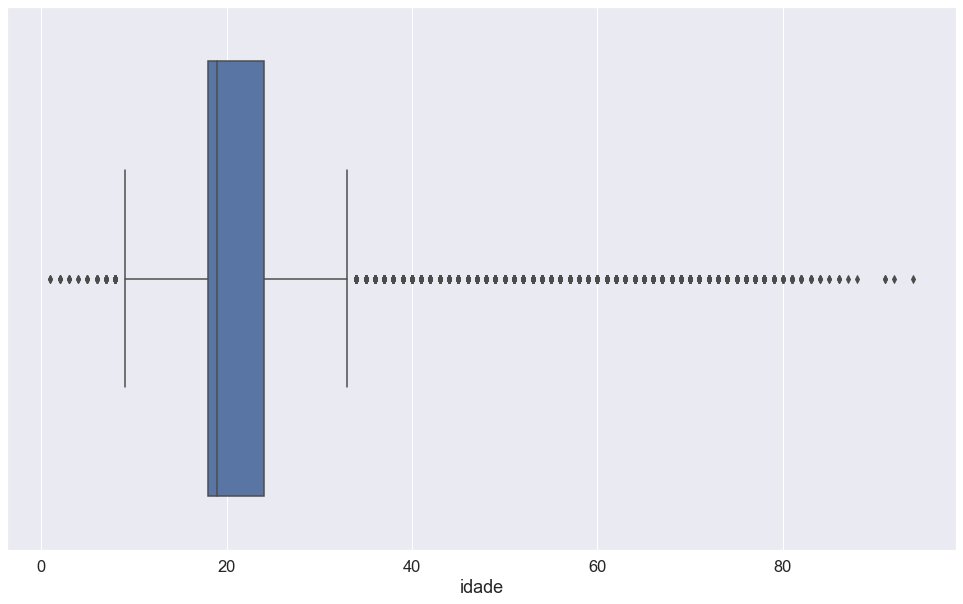

In [15]:
sns.boxplot(base_enem.idade);

Vamos melhorar esse gráfico um pouco mais e deixa-lo apresentável:

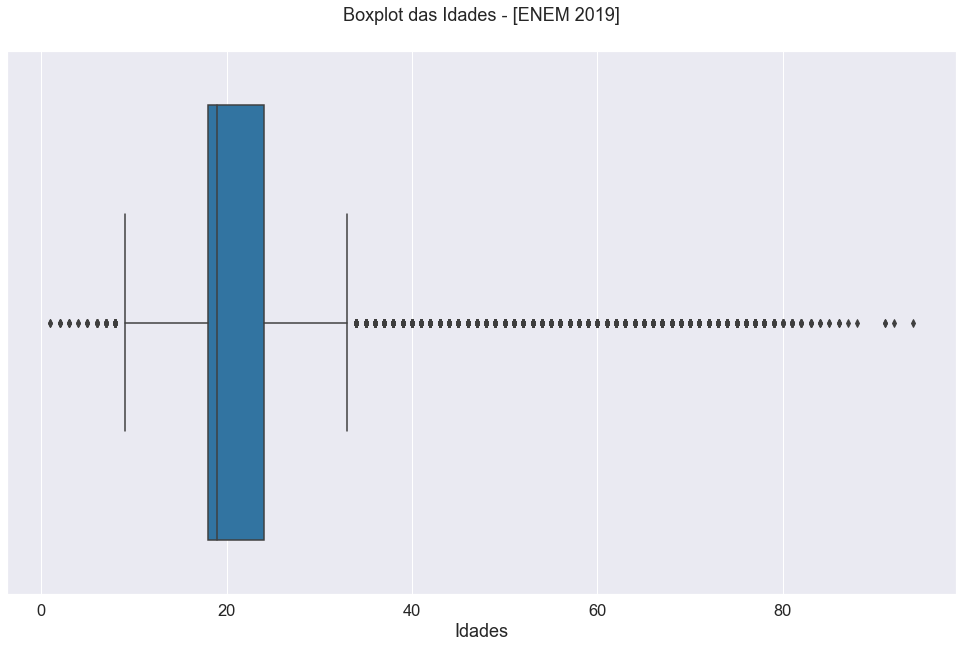

In [16]:
sns.boxplot(base_enem.idade, color='tab:blue') # Criando o gráfico de Boxplot para as idades

plt.xlabel('Idades') # Rótulo do Eixo X
plt.title('Boxplot das Idades - [ENEM 2019]');

Conseguimos ver nítidamente a concentração das idades por meio do gráfico acima.

Vamos mudar a forma de visualização agora, para um gráfico de histograma. Um Histograma, faz grupos de dados, como por exemplo abaixo vai estar agrupado de 5 em 5 anos e assim vamos ver quantos inscritos temos em cada grupo.

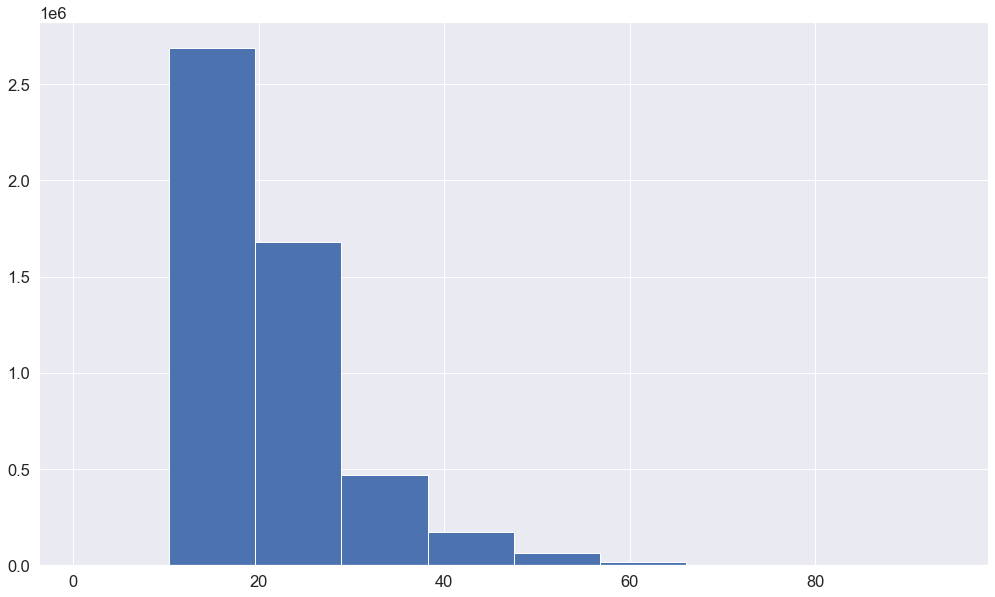

In [17]:
base_enem.idade.hist();

Obs: No eixo Vertical, temos números como 2.5, isso não quer dizer que tem apenas 2.5 pessoas naquela ponto do gráfico, mas sim que tem 2.5*(10^6) pessoas (2500000), pois estamos usando a notação 1e6 para simplificar.

Vamos adicionar um pouco de estilo a esse gráfico também:

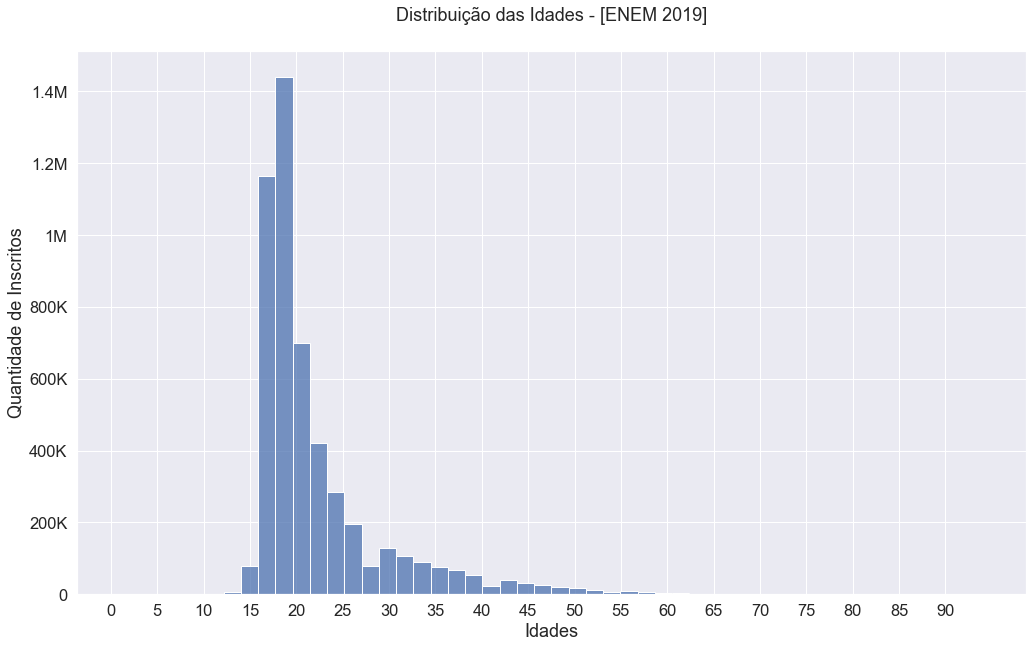

In [18]:
sns.histplot(base_enem.idade, bins=50) # Bins é quantidade de barras possiveis.

plt.yticks(
    ticks=[0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000],
    labels=['0', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']
) # Valores presentes no eixo y

plt.xticks(range(0, 91, 5)) # Valores presentes no eixo X


plt.ylabel("Quantidade de Inscritos") # Nome do Eixo  Vertical
plt.xlabel("Idades") # Nome do Eixo Horizontal

plt.title("Distribuição das Idades - [ENEM 2019]"); # Titulo do gráfico

Vamos adicionar um complemento, por exemplo uma barra indicando a média das idades:

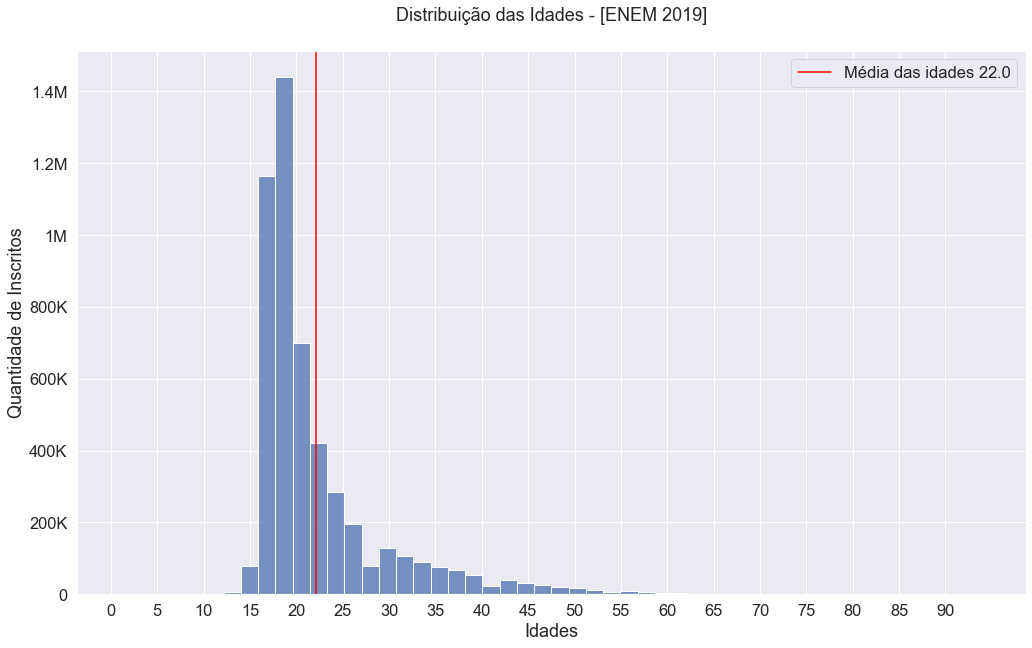

In [19]:
media_idades = base_enem.idade.mean() # Calculando a média das idades 
sns.histplot(base_enem.idade, bins=50) # Bins é quantidade de barras possiveis.

plt.yticks(
    ticks=[0, 200000, 400000, 600000, 800000, 1000000, 1200000, 1400000],
    labels=['0', '200K', '400K', '600K', '800K', '1M', '1.2M', '1.4M']
) # Valores presentes no eixo y

plt.xticks(range(0, 91, 5)) # Valores presentes no eixo X
plt.axvline(media_idades, c='red', label='Média das idades {}'.format(round(media_idades,0))) #linha horizontal com a média

plt.ylabel("Quantidade de Inscritos") # Nome do Eixo  Vertical
plt.xlabel("Idades") # Nome do Eixo Horizontal

plt.title("Distribuição das Idades - [ENEM 2019]") # Titulo do gráfico
plt.legend()

Vamos continuar explorando outros dados. Para isso vamos chamar a função sample que vai nos dar uma amostra aleatória dos dados

In [20]:
base_enem.sample(10)  # Gera uma amostra com 10 registros aleatórios da nossa tabela 

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
47729,47730,21,M,Concluído,1,0,0,0,0,1,...,5,998.00 até 1497.00,558.40,505.20,544.20,441.40,560.00,PA,AUGUSTO CORRÊA,1500909
3951891,3951892,18,F,Cursando,2,0,0,0,0,1,...,4,3992.00 até 4990.00,485.10,586.20,583.20,514.40,700.00,PA,PARAUAPEBAS,1505536
1608637,1608638,18,M,Cursando,2,0,0,0,0,1,...,4,998.00 até 1497.00,473.70,542.70,544.80,624.40,600.00,MG,RIO PARDO DE MINAS,3155603
693431,693432,21,M,Concluído,1,0,0,0,0,1,...,4,2495.00 até 2994.00,464.70,545.60,575.50,622.90,540.00,RS,RIO GRANDE,4315602
1967223,1967224,17,M,Cursando,2,0,0,0,0,1,...,6,998.00 até 1497.00,430.30,437.00,419.30,569.90,600.00,GO,GOIÂNIA,5208707
4703536,4703537,19,M,Concluído,1,0,0,0,0,1,...,5,1497.00 até 1996.00,514.00,380.80,464.40,576.20,0.00,RN,PARNAMIRIM,2403251
874397,874398,17,M,Cursando,1,1,0,0,0,1,...,4,7984.00 até 8982.00,NaN,NaN,NaN,NaN,NaN,PR,CAMPINA GRANDE DO SUL,4104006
4184826,4184827,18,F,Cursando,1,1,0,0,0,1,...,3,Nenhuma Renda,420.90,488.00,461.90,398.30,500.00,PB,CUBATI,2505006
1622832,1622833,19,F,Cursando,2,0,0,0,0,1,...,8,<= 998.00,NaN,327.40,420.90,NaN,0.00,MG,DIVINÓPOLIS,3122306
1887155,1887156,22,F,Concluído,1,0,0,0,0,1,...,3,998.00 até 1497.00,504.00,533.50,523.20,460.10,580.00,MT,RONDONÓPOLIS,5107602


Vamos explorar outra coluna por agora... que tal a coluna contendo informações sobre sexo ? Será se temos mais homens ou mulheres inscritos para o ENEM de 2019 ?

Uma função muito útil para isso é o value_counts() essa função literalmente conta quantos registros temos para cada valor dentro da coluna. Vamos ver isso na prática:

In [21]:
base_enem.sexo.value_counts() # contar

F    3031822
M    2063448
Name: sexo, dtype: int64

Com um única linha de python foi possível descobrir quantas ocorrências de F (Feminino) e M (Masculino) houve na base de dados. Mas trabalhar com valores soltos não é muito interessante, vamos tentar manipulá-los:

Uma vantagem de se trabalhar com o Numpy/Pandas, é que podemos fazer operações aritméticas com vetores de uma forma bem simples, por exemplo:

In [22]:
np.array([10, 10])  + 1001 # adição

array([1011, 1011])

Na linha de código acima eu somei 1001 à cada elemento do array.

Podemos também fazer operções de multiplicação e divisões dessa mesma forma

In [23]:
np.array([10, 20])  * 100 # multiplicação

array([1000, 2000])

In [24]:
np.array([10, 20])  / 2 # divisão

array([ 5., 10.])

Vamos usar essa técnica para calcular quantos porcento dos nossos registros da tabela sexo são M e F:

In [25]:
(base_enem.sexo.value_counts() *100)/ base_enem.sexo.count() 

F   59.50
M   40.50
Name: sexo, dtype: float64

Agora temos que 59% da nossa base é Feminina, e 40% é masculina apenas. Talvez isso seja uma consequência de ter um país com mais mulheres do que homens, ou realmente mostra um interesse maior das mulheres em buscar um ensino superior. Mas nem tudo vamos conseguir explicar apenas com os dados que temos...

Vamos também mostrar essa informação para ficar um pouco mais intuitiva:

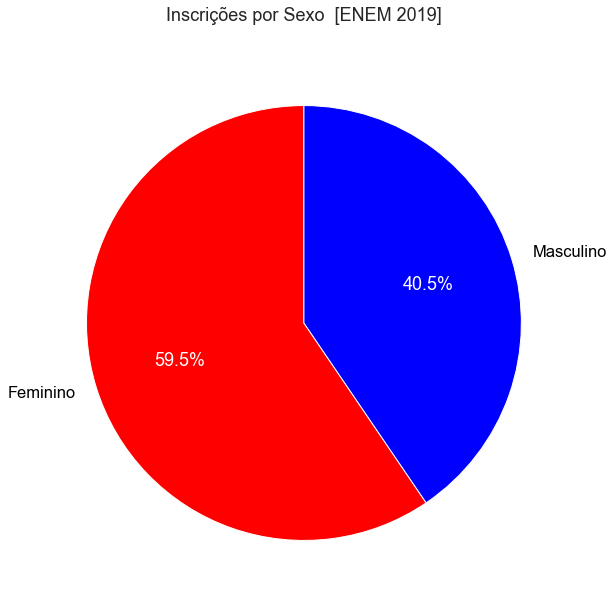

In [26]:
enem_por_sexo = base_enem.sexo.value_counts() # Contabilizamos os registros por cada sexo.

_, ax = plt.subplots() # Criamos a figura onde exibiremos o Gráfico

patches, texts, autotexts = ax.pie( # configuramos o gráfico de Pizza.
    enem_por_sexo, 
    colors = ['red','blue'], 
    labels=['Feminino', 'Masculino'], 
    autopct='%1.1f%%', 
    startangle=90
)
for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Inscrições por Sexo  [ENEM 2019]');

Vamos olhar outra amostra aleatória de dados

In [27]:
base_enem.sample(10)

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
2544493,2544494,18,M,Concluído,1,0,0,0,0,1,...,5,1996.00 até 2495.00,559.30,557.50,527.50,692.30,520.00,SP,SÃO PAULO,3550308
3178114,3178115,39,M,Concluído,1,0,0,0,0,1,...,3,1497.00 até 1996.00,561.90,621.70,570.90,626.40,520.00,MG,BELO HORIZONTE,3106200
2924712,2924713,19,M,Cursando,2,0,0,0,0,1,...,4,<= 998.00,450.30,508.90,494.30,465.50,560.00,MA,SERRANO DO MARANHÃO,2111789
4165133,4165134,19,M,Concluído,1,0,0,0,0,1,...,4,<= 998.00,414.50,401.90,489.30,604.30,420.00,CE,JUAZEIRO DO NORTE,2307304
3300710,3300711,22,F,Concluído,1,0,0,0,0,1,...,6,<= 998.00,525.50,452.90,472.00,555.00,700.00,PI,OEIRAS,2207009
2713662,2713663,33,F,Concluído,1,0,0,0,0,1,...,5,3992.00 até 4990.00,536.10,581.90,599.40,646.50,580.00,SP,SÃO PAULO,3550308
3356213,3356214,40,F,Concluído,1,0,0,0,0,1,...,4,1497.00 até 1996.00,584.60,614.30,629.00,700.50,600.00,RJ,NILÓPOLIS,3303203
4829251,4829252,18,M,Cursando,2,0,0,0,0,1,...,4,<= 998.00,372.00,443.30,422.70,433.30,520.00,SP,BARRETOS,3505500
4220005,4220006,18,F,Concluído,1,0,0,0,0,1,...,3,1996.00 até 2495.00,NaN,NaN,NaN,NaN,NaN,SC,ABDON BATISTA,4200051
3633096,3633097,17,M,Cursando,2,0,0,0,0,1,...,4,1996.00 até 2495.00,NaN,NaN,NaN,NaN,NaN,AL,UNIÃO DOS PALMARES,2709301


Na coluna tipo_ens_med, tem informações sobre qual o tipo de escola que o inscrito estudou no seu ensino médio. Mas ela não nos trás valores completos, apenas uma informação numérica como descrito abaixo: 

1.   Não Respondeu
2.   Pública
3.   Privada
4.   Exterior

Para facilitar nossa análise, vamos aplicar uma função que vai mapear os valores numérios para textuais como vimos acima:

In [28]:
mapa_tipo_ensino_medio = {
    1: 'Sem Resposta',
    2: 'Pública',
    3: 'Privada',
    4: 'Exterior'
}

Criamos um dicionário que cada chave é um registro na tabela, e os valores associados às chaves, são o que queremos substituir. Agora é só chamar a função map do pandas

In [29]:
base_enem['tipo_ens_med'] = base_enem['tipo_ens_med'].map(mapa_tipo_ensino_medio)
base_enem

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,Sem Resposta,0,0,0,0,1,...,7,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807
1,2,16,F,Cursando,Sem Resposta,1,0,0,0,1,...,5,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,Privada,0,0,0,0,1,...,3,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502
3,4,23,M,Cursando,Pública,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,Sem Resposta,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095265,5095266,28,F,Concluído,Sem Resposta,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,Sem Resposta,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408
5095267,5095268,18,F,Concluído,Sem Resposta,0,0,0,0,1,...,5,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,TREMEDAL,2931806
5095268,5095269,16,M,Cursando,Sem Resposta,1,0,0,0,1,...,6,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408


Agora que temos os valores corrigidos na nossa base, vamos usar a função que aprendemos para contabilizar totais para cada valor único na tabela:

In [30]:
base_enem.tipo_ens_med.value_counts()*100 / base_enem.tipo_ens_med.count()

Sem Resposta   71.23
Pública        24.48
Privada         4.29
Name: tipo_ens_med, dtype: float64

Grande parte da nossa base prefiriu não declarar respostas sobre essa pergunta. Vamos visualizar isso também

In [31]:
base_enem.tipo_ens_med.value_counts()

Sem Resposta    3629376
Pública         1247262
Privada          218632
Name: tipo_ens_med, dtype: int64

Para visualizar isso vamos fazer um pequeno tratamento aos dados:

Vamos criar uma variável que vai armazenar a quantidade de inscrições por tipo de ensino médio. Isso vai facilitar nossa vida para gerar uma visualização.

Para isso vamos usar 2 funções importantíssimas do pandas: groupby e reset_index()

A função group by gera uma nova tabela agrupando os dados pela coluna ou colunas passadas no parâmetro by e aplica alguma estatística descritiva para agregar os dados, como por exemplo as funções que vimos: sum, mean, count, nunique e etc..

Já a função reset_index, vai apenas corrigir o index (aqueles númerozinhos do lado esquerdo da tabela.

In [32]:
df_visualizacao = base_enem.groupby(by=['tipo_ens_med']).count()['inscricao'].reset_index()
df_visualizacao

,tipo_ens_med,inscricao
0,Privada,218632
1,Pública,1247262
2,Sem Resposta,3629376


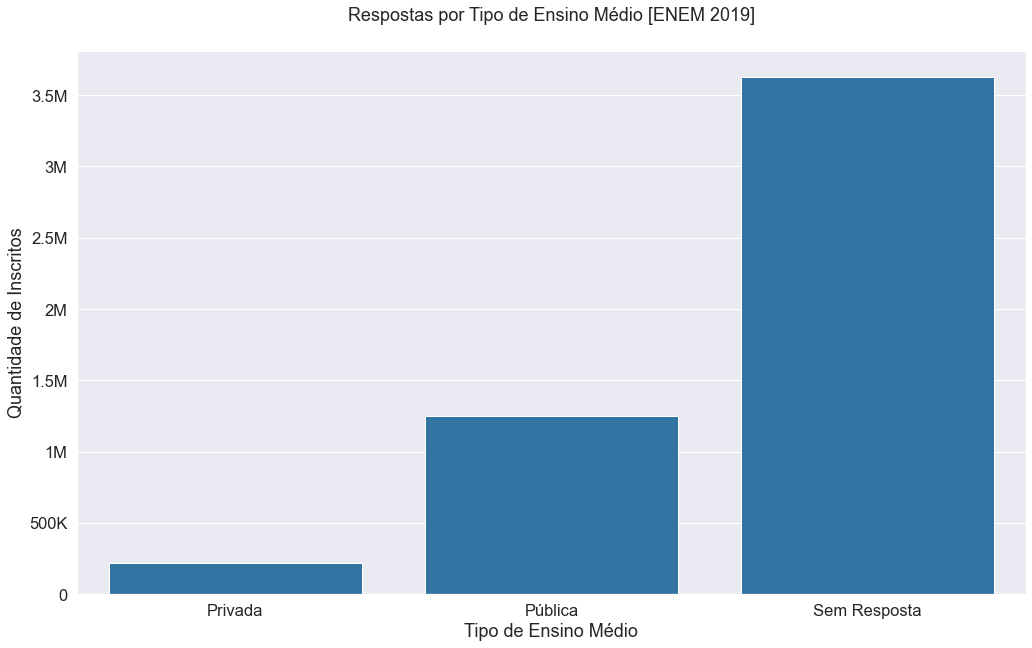

In [33]:
sns.barplot(df_visualizacao.tipo_ens_med,  df_visualizacao.inscricao, color='tab:blue') # Criando um gráfico de Barras 

plt.yticks(
    ticks=[0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000],
    labels=['0', '500K', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M']
) # Valores presentes no eixo y



plt.xlabel("Tipo de Ensino Médio") # Rótulo do eixo X
plt.ylabel("Quantidade de Inscritos") # Rótulo do eixo Y

plt.title("Respostas por Tipo de Ensino Médio [ENEM 2019]");

# **Limpando e Explorando os Dados**

Bom, vamos agora para a parte mais interessante da nossa análise, as notas do ENEM, vamos ver uma amostra desses dados. Para isso vamos filtrar apenas as colunas referentes a Notas:

In [34]:
base_enem[['nota_ct','nota_ch','nota_lc','nota_mt','nota_redacao']].sample(15) # 15 amostras aleatórias 

,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao
176611,437.20,575.50,536.30,427.50,560.00
3830337,448.40,481.80,495.90,446.00,580.00
820421,NaN,NaN,NaN,NaN,NaN
1484825,490.80,391.90,505.50,403.70,360.00
3635222,355.40,425.20,389.10,520.00,260.00
95023,478.30,511.00,531.80,533.50,600.00
3763149,414.80,544.80,562.60,523.00,540.00
4159964,NaN,NaN,NaN,NaN,NaN
3352046,471.30,509.60,576.70,553.20,560.00
4981761,388.00,525.50,562.40,404.80,600.00


Já de Cara, podemos perceber que há ocorrências de valores bem estranhos... esses NaN. Quando há valores como NaN ou nan, significa que aquela célula está vazia. NaN, é a abreviação para Not a Number (não é um número), também usado quando não há informações à serem representadas.

Um dos passos mais importantes numa análise de dados, é lidar com dados sujos... Isto é, aqueles dados que não tem valores preenchidos, ou são outliers que não deveriam existir e outras anômalias que deixam nossa análise mais complicada. A ideia por tras disso é poder trabalhar apenas com os dados que realmente retratam a situação que vamos observar.

Existem algumas tecnicas para tratar dados faltantes, como por exemplo, substituir os valores nulos pela média ou mediana. Outro que é muito comum de ser utilizado é excluir os registros que tem dados faltantes. (Geralmente fazemos isso quando temos muitoooos registros e retirar alguns, não mudaria muito nossa análise, como o nosso caso.)



Como podemos pegar por exemplo apenas os registros que tem notas de Ciências e Tecnologias preenchidos ?

Podemos usar a função isna() para descobrir se um registro é NaN ou não.

In [35]:
base_enem['nota_ct'].isna()

0          False
1          False
2          False
3           True
4           True
           ...  
5095265     True
5095266     True
5095267     True
5095268    False
5095269    False
Name: nota_ct, Length: 5095270, dtype: bool

Veja que ao usar a função isna() tivemos uma lista de True/False dizendo se a linha tem elementos NaN

Podemos Usar isso para filtrar nossa tabela principal:

In [36]:
base_enem[ # conjunto de filtros
    base_enem['nota_ct'].isna()
]

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
3,4,23,M,Cursando,Pública,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,SÃO SEBASTIÃO DA BOA VISTA,1507706
4,5,23,M,Concluído,Sem Resposta,0,0,0,0,1,...,5,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,PA,JURUTI,1503903
11,12,24,F,Cursando,Pública,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,PA,TUCURUÍ,1508100
12,13,22,M,Concluído,Sem Resposta,0,0,0,0,1,...,4,1497.00 até 1996.00,NaN,NaN,NaN,NaN,NaN,PA,ANANINDEUA,1500800
13,14,31,M,Concluído,Sem Resposta,0,0,0,0,1,...,2,1497.00 até 1996.00,NaN,NaN,NaN,NaN,NaN,PA,BELÉM,1501402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095260,5095261,37,F,Concluído,Sem Resposta,0,0,0,0,1,...,3,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,MG,BETIM,3106705
5095264,5095265,30,F,Concluído,Sem Resposta,0,0,0,0,1,...,3,<= 998.00,NaN,NaN,NaN,NaN,NaN,BA,JUAZEIRO,2918407
5095265,5095266,28,F,Concluído,Sem Resposta,0,0,0,0,1,...,1,998.00 até 1497.00,NaN,NaN,NaN,NaN,NaN,BA,SANTO AMARO,2928604
5095266,5095267,25,M,Concluído,Sem Resposta,0,0,0,0,1,...,2,Nenhuma Renda,NaN,NaN,NaN,NaN,NaN,BA,SALVADOR,2927408


Acabamos de filtrar todos os registros que tem a nota_ct como NaN. Mas queremos Justamente o Inverso....

Para isso vamos fazer a negação do filtro, vamos inverter o que é True/False

In [37]:
~base_enem['nota_ct'].isna()

0           True
1           True
2           True
3          False
4          False
           ...  
5095265    False
5095266    False
5095267    False
5095268     True
5095269     True
Name: nota_ct, Length: 5095270, dtype: bool

A negação em listas do Pandas, é por meio do operador ~ e não do ! como estamos usualmente acostumados

In [38]:
base_enem[ # conjunto de filtros
    ~base_enem['nota_ct'].isna()
]

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,Sem Resposta,0,0,0,0,1,...,7,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807
1,2,16,F,Cursando,Sem Resposta,1,0,0,0,1,...,5,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,Privada,0,0,0,0,1,...,3,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502
5,6,31,M,Concluído,Sem Resposta,0,0,0,0,1,...,5,998.00 até 1497.00,522.00,592.60,582.00,605.30,580.00,PA,ANANINDEUA,1500800
6,7,30,F,Concluído,Sem Resposta,0,0,0,0,1,...,4,998.00 até 1497.00,407.40,480.10,464.30,581.50,360.00,PA,MARABÁ,1504208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,5095262,27,F,Concluído,Sem Resposta,0,0,0,0,1,...,3,<= 998.00,486.70,457.80,506.70,488.50,280.00,BA,SALVADOR,2927408
5095262,5095263,22,F,Concluído,Sem Resposta,0,0,0,0,1,...,7,998.00 até 1497.00,454.20,542.70,599.30,504.70,400.00,BA,SANTO AMARO,2928604
5095263,5095264,32,M,Concluído,Sem Resposta,0,0,0,0,1,...,2,998.00 até 1497.00,450.40,469.00,515.70,552.00,580.00,BA,CANSANÇÃO,2906808
5095268,5095269,16,M,Cursando,Sem Resposta,1,0,0,0,1,...,6,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408


Beleza, agora conseguimos filtrar todos os Resultados que buscavamos. Mas repare bem que filtramos apenas por notas de Ciências Naturais que não estão vazias... Precisamos também filtrar o restante.

Para isso podemos aplicar and. Por exemplo, quero registros com nota_ct não nulas e nota_lc não nulas.

No pandas, para operar filtros com and, usamos o operador &

In [39]:
base_enem[ # conjunto de filtros
    (~base_enem['nota_ct'].isna()) &
    (~base_enem['nota_ch'].isna()) &
    (~base_enem['nota_lc'].isna()) &
    (~base_enem['nota_mt'].isna()) &
    (~base_enem['nota_redacao'].isna())
]

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,Sem Resposta,0,0,0,0,1,...,7,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807
1,2,16,F,Cursando,Sem Resposta,1,0,0,0,1,...,5,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,Privada,0,0,0,0,1,...,3,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502
5,6,31,M,Concluído,Sem Resposta,0,0,0,0,1,...,5,998.00 até 1497.00,522.00,592.60,582.00,605.30,580.00,PA,ANANINDEUA,1500800
6,7,30,F,Concluído,Sem Resposta,0,0,0,0,1,...,4,998.00 até 1497.00,407.40,480.10,464.30,581.50,360.00,PA,MARABÁ,1504208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,5095262,27,F,Concluído,Sem Resposta,0,0,0,0,1,...,3,<= 998.00,486.70,457.80,506.70,488.50,280.00,BA,SALVADOR,2927408
5095262,5095263,22,F,Concluído,Sem Resposta,0,0,0,0,1,...,7,998.00 até 1497.00,454.20,542.70,599.30,504.70,400.00,BA,SANTO AMARO,2928604
5095263,5095264,32,M,Concluído,Sem Resposta,0,0,0,0,1,...,2,998.00 até 1497.00,450.40,469.00,515.70,552.00,580.00,BA,CANSANÇÃO,2906808
5095268,5095269,16,M,Cursando,Sem Resposta,1,0,0,0,1,...,6,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408


Agora simm!! Temos o resultado que desejavamos. Vamos também aproveitar e filtrar apenas registros que tiveram notas maiores que 0 (que de fato realmente conseguiu fazer pelo menos uma questão).

Vamos armazenar isso em uma nova variável.

In [40]:
base_enem_notas = base_enem[ # conjunto de filtros
    (~base_enem['nota_ct'].isna()) &
    (~base_enem['nota_ch'].isna()) &
    (~base_enem['nota_lc'].isna()) &
    (~base_enem['nota_mt'].isna()) &
    (~base_enem['nota_redacao'].isna()) &
    (base_enem['nota_ct'] > 0) &
    (base_enem['nota_ch'] > 0) &
    (base_enem['nota_lc'] > 0) &
    (base_enem['nota_mt'] > 0) &
    (base_enem['nota_redacao'] > 0)
]
base_enem_notas

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,pessoas_na_residencia,renda_mensal_familiar,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id
0,1,21,M,Concluído,Sem Resposta,0,0,0,0,1,...,7,<= 998.00,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807
1,2,16,F,Cursando,Sem Resposta,1,0,0,0,1,...,5,<= 998.00,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059
2,3,18,F,Cursando,Privada,0,0,0,0,1,...,3,998.00 até 1497.00,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502
5,6,31,M,Concluído,Sem Resposta,0,0,0,0,1,...,5,998.00 até 1497.00,522.00,592.60,582.00,605.30,580.00,PA,ANANINDEUA,1500800
6,7,30,F,Concluído,Sem Resposta,0,0,0,0,1,...,4,998.00 até 1497.00,407.40,480.10,464.30,581.50,360.00,PA,MARABÁ,1504208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,5095262,27,F,Concluído,Sem Resposta,0,0,0,0,1,...,3,<= 998.00,486.70,457.80,506.70,488.50,280.00,BA,SALVADOR,2927408
5095262,5095263,22,F,Concluído,Sem Resposta,0,0,0,0,1,...,7,998.00 até 1497.00,454.20,542.70,599.30,504.70,400.00,BA,SANTO AMARO,2928604
5095263,5095264,32,M,Concluído,Sem Resposta,0,0,0,0,1,...,2,998.00 até 1497.00,450.40,469.00,515.70,552.00,580.00,BA,CANSANÇÃO,2906808
5095268,5095269,16,M,Cursando,Sem Resposta,1,0,0,0,1,...,6,4990.00 até 5988.00,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408


Aqui vale a pena ressaltar que boa parte da nossa base teve registros removidos. Podemos calcular quantos % dos dados foram jogados fora por terem notas sem informação, vamos comparar a quantidade de registro nas nossas 2 tabelas:

In [41]:
(base_enem_notas.inscricao.count()/ base_enem.inscricao.count()) *100 

70.52788174130124

Conseguimos ver que a nossa base com as notas limpas tem apenas 70% dos registros da nossa base de dados completa.

Com isso temos mais uma informação Extremamente importante, 30% das inscrições no ENEM 2019 tiveram pelo menos uma das notas nulas.

O processo de limpar os dados também nos trás informações interessantes, sobre o quanto de coisa redundante está acontecendo

# **Explorando as informações de Nota**

Vamos ver um overview geral das notas, para termos uma noção dos dados que temos para trabalhar. Para isso começaremos selecionando todos as colunas de notas e chamando a função describe()

In [42]:
base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].describe()

,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao
count,3593586.00,3593586.00,3593586.00,3593586.00,3593586.00
mean,479.51,512.27,524.47,525.37,596.90
std,75.86,79.42,61.09,109.08,155.23
min,327.90,315.90,322.00,359.00,40.00
25%,419.40,453.80,488.10,436.90,500.00
50%,472.50,515.80,529.40,503.90,580.00
75%,534.90,570.10,567.70,600.60,680.00
max,860.90,835.10,801.70,985.50,1000.00


Aparentemente a redação tem uma média bem maior que as outras notas.
Matemática e Linguagens tem uma média e mediana maior do que Ciências naturais e Ciências Humanas.
Vamos aprofundar isso utilizando visualizações, acho que o Boxplot seria o ideal para mostrar tanta informação distinta (várias colunas de notas).

Mas dessa vez vamos usar o boxplot que o Pandas já monta para nós:

<AxesSubplot:>

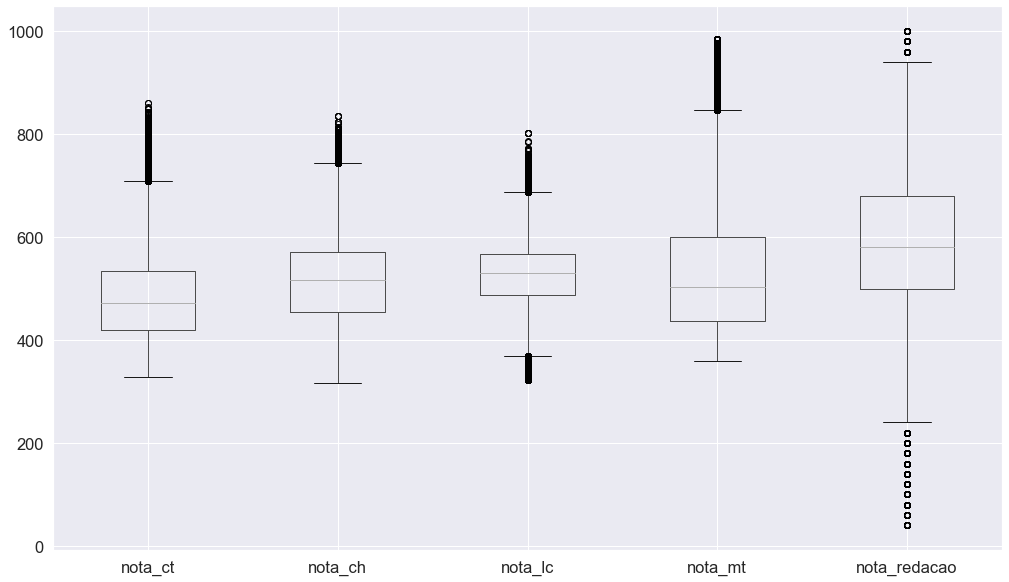

In [43]:
base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].boxplot()

Ficou bem parecido com o gráfico que montamos no Seaborn anteriomente. Vamos deixar esse gráfico um pouco mais bonito e legível

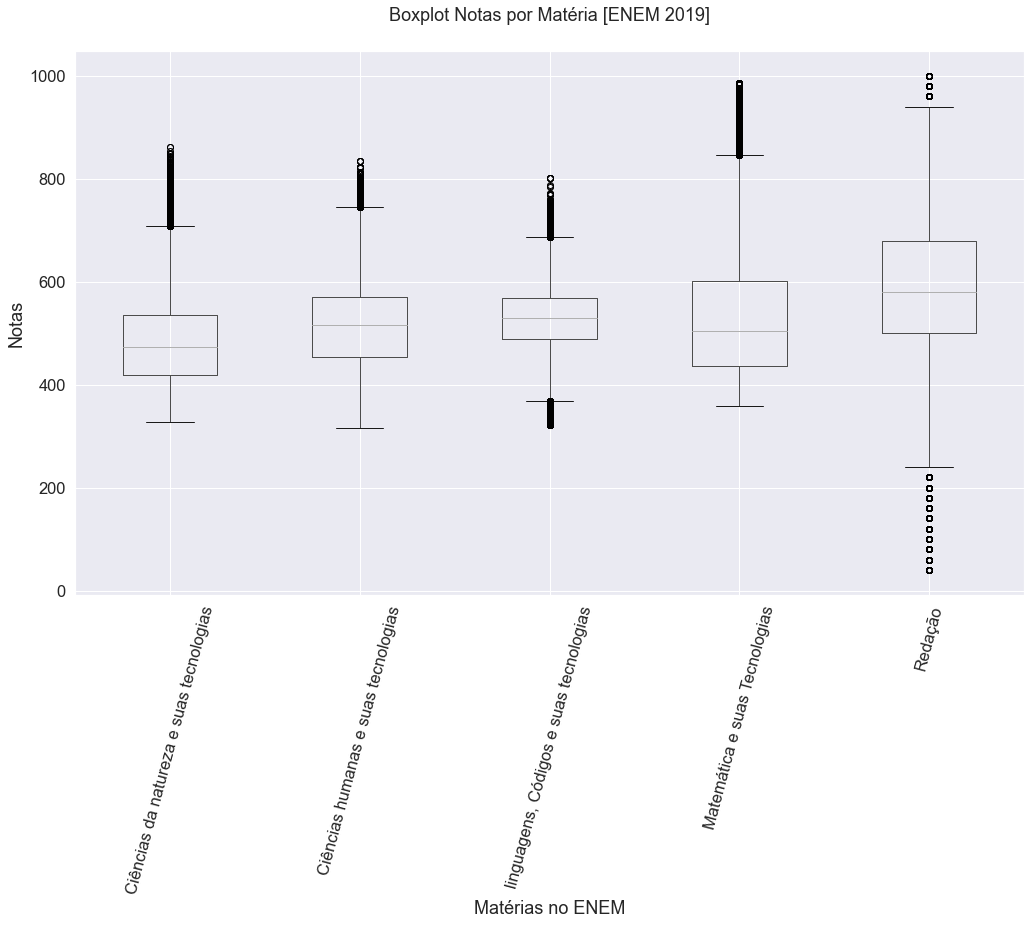

In [44]:
base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].boxplot()

plt.xticks(
    ticks=[1,2,3,4, 5], 
    labels=['Ciências da natureza e suas tecnologias', 'Ciências humanas e suas tecnologias', 'linguagens, Códigos e suas tecnologias', 'Matemática e suas Tecnologias', 'Redação'], 
    rotation=75
)

plt.xlabel("Matérias no ENEM")
plt.ylabel("Notas")

plt.title("Boxplot Notas por Matéria [ENEM 2019]");

Aqui vemos que as pessoas há mais chances de Notas altíssimas em Matemática mais do que em outras matérias. Mas em geral, grande parte das notas se encontram entre 400 e 500

Inicialmente esse gráfico, esse gráfico não significa muita coisa, mas podemos aprofundar ele com mais detalhes.

Podemos olhar essa informação de forma mais "micro", vamos olhar apenas para Matemática e Linguagem.

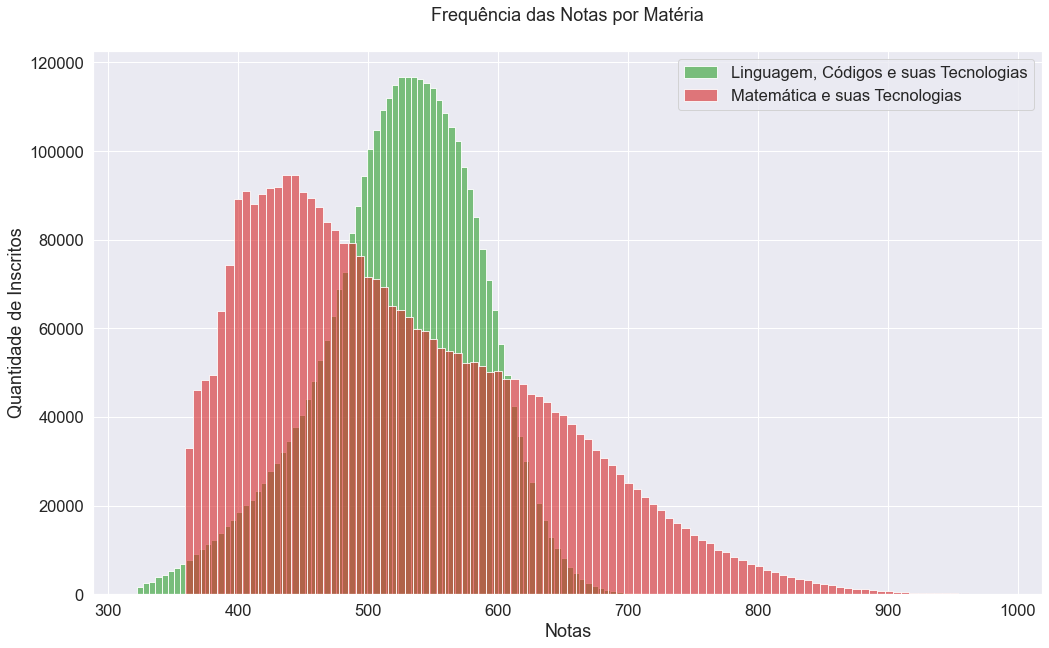

In [45]:
sns.histplot(base_enem_notas.nota_lc, bins=100, color='tab:green', alpha=0.6, label="Linguagem, Códigos e suas Tecnologias")
sns.histplot(base_enem_notas.nota_mt, bins=100, color='tab:red', alpha=0.6, label="Matemática e suas Tecnologias")
# sns.histplot(base_enem_notas.nota_ch, bins=100, color='blue', alpha=0.6, label="Ciências Humanas e suas Tecnologias")

plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')

plt.title("Frequência das Notas por Matéria")
plt.legend();

A tendência central e a mediana da Nota em Linguagens é maior do que a de matemática, isso é visível.

Mas por outro lado, há muito mais pessoas tirando notão em matemática do que em linguagens.

Vamos agora dar uma olhada na média geral das notas dos alunos no ENEM. Como não temos uma coluna com a média de todas as notas, vamos criar:

* Nota_media: vai receber a média entre todas as notas do ENEM.
* Media_questionario: vai recber a média entre todas as notas do ENEM menos a nota de Redação.



In [46]:
base_enem_notas['nota_media'] = base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt', 'nota_redacao']].mean(axis=1)
base_enem_notas['media_questionario'] = base_enem_notas[['nota_ct', 'nota_ch', 'nota_lc', 'nota_mt']].mean(axis=1)
base_enem_notas

,inscricao,idade,sexo,conclusao_ens_med,tipo_ens_med,treineiro,cadeira_canhoto,gestante,idoso,celular_na_residencia,...,nota_ct,nota_ch,nota_lc,nota_mt,nota_redacao,estado,municipio,municipio_id,nota_media,media_questionario
0,1,21,M,Concluído,Sem Resposta,0,0,0,0,1,...,472.90,466.00,497.30,369.10,780.00,PA,SANTARÉM,1506807,517.06,451.33
1,2,16,F,Cursando,Sem Resposta,1,0,0,0,1,...,358.90,495.40,482.30,416.50,600.00,PA,MÃE DO RIO,1504059,470.62,438.27
2,3,18,F,Cursando,Privada,0,0,0,0,1,...,574.20,538.70,582.60,571.50,640.00,PA,PARAGOMINAS,1505502,581.40,566.75
5,6,31,M,Concluído,Sem Resposta,0,0,0,0,1,...,522.00,592.60,582.00,605.30,580.00,PA,ANANINDEUA,1500800,576.38,575.47
6,7,30,F,Concluído,Sem Resposta,0,0,0,0,1,...,407.40,480.10,464.30,581.50,360.00,PA,MARABÁ,1504208,458.66,483.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095261,5095262,27,F,Concluído,Sem Resposta,0,0,0,0,1,...,486.70,457.80,506.70,488.50,280.00,BA,SALVADOR,2927408,443.94,484.93
5095262,5095263,22,F,Concluído,Sem Resposta,0,0,0,0,1,...,454.20,542.70,599.30,504.70,400.00,BA,SANTO AMARO,2928604,500.18,525.23
5095263,5095264,32,M,Concluído,Sem Resposta,0,0,0,0,1,...,450.40,469.00,515.70,552.00,580.00,BA,CANSANÇÃO,2906808,513.42,496.77
5095268,5095269,16,M,Cursando,Sem Resposta,1,0,0,0,1,...,458.80,380.60,493.10,396.70,800.00,BA,SALVADOR,2927408,505.84,432.30


Agora podemos gerar um gráfico para analisarmos a distribuição das notas médias do ENEM:

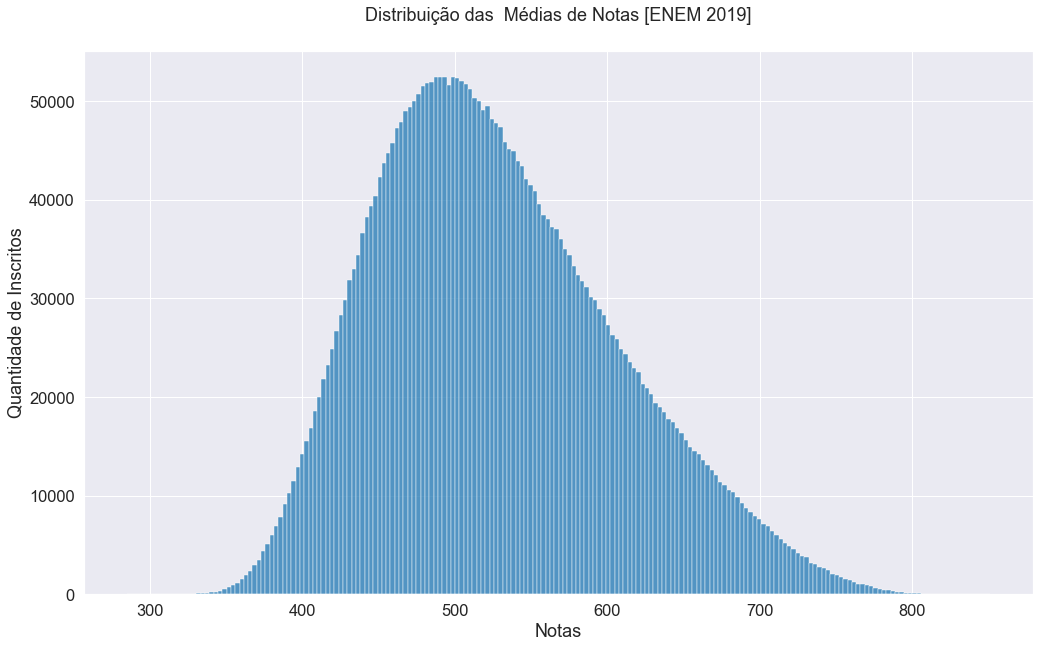

In [47]:
sns.histplot(base_enem_notas.nota_media, bins=200, color='tab:blue')
plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')
plt.title("Distribuição das  Médias de Notas [ENEM 2019]");

Temos claramente uma distribuição Normal aqui, em que há uma medida central, a média geral, e que quanto mais longe dessa média, menos pessoas encontraremos.

Uma coisa assustadora que podemos analisar, imagine por exemplo que gostariamos de ver os competidores do ENEM 2019 para as vagas de Medicina na USP em 2019.

Nesse período, a nota de corte na USP era de 780 para Medicina, Vamos ver a pequena parcela que poderia participar dessa competição

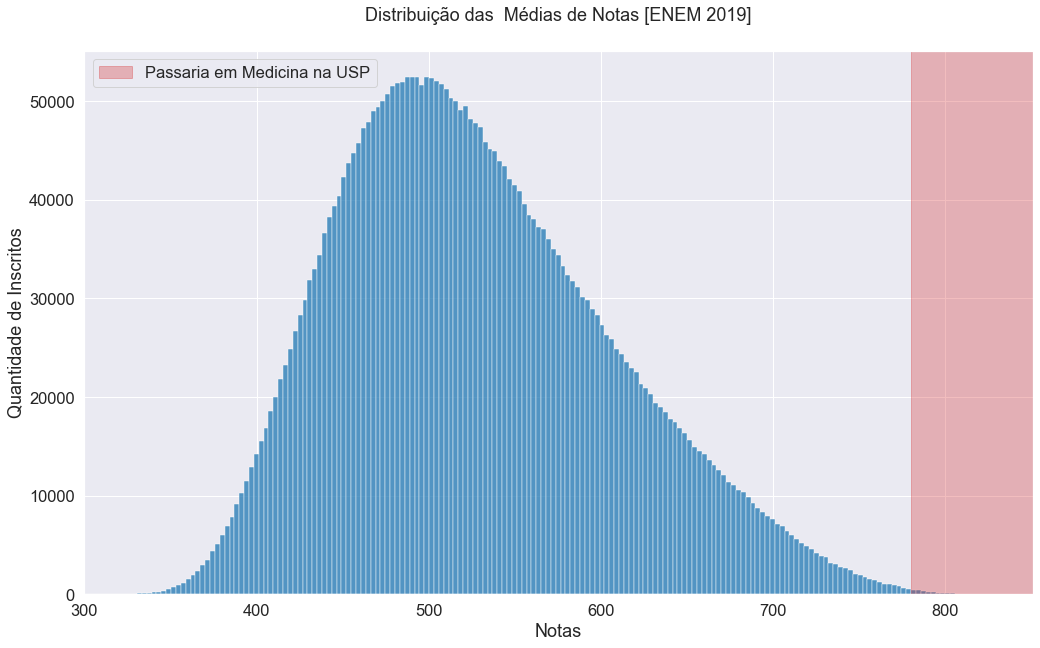

In [48]:
sns.histplot(base_enem_notas.nota_media, bins=200, color='tab:blue')

plt.xlim(300, base_enem_notas.nota_media.max())
plt.axvspan(780, base_enem_notas.nota_media.max(), alpha=0.3, color='tab:red', label="Passaria em Medicina na USP") #cria uma aréa colorida no gráfico

plt.xlabel('Notas')
plt.ylabel('Quantidade de Inscritos')
plt.title("Distribuição das  Médias de Notas [ENEM 2019]")
plt.legend();

In [49]:
(base_enem_notas[base_enem_notas['nota_media'] > 780].inscricao.count() / base_enem_notas.inscricao.count())*100

0.07012493926679367

In [50]:
base_enem_notas[base_enem_notas['nota_media'] > 780].inscricao.count()

2520

Apenas 0.07% dos inscritos do ENEM de 2019 seriam capazes de competir para uma vaga em Medicina na USP. Isso representa, apenas 2520 inscritos do ENEM. Uma competição completamente difícil.

Outra forma de análisar esses mesmos dados são por meio de visualizações como Boxplots, vamos tentar visualizar essa informação a seguir:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


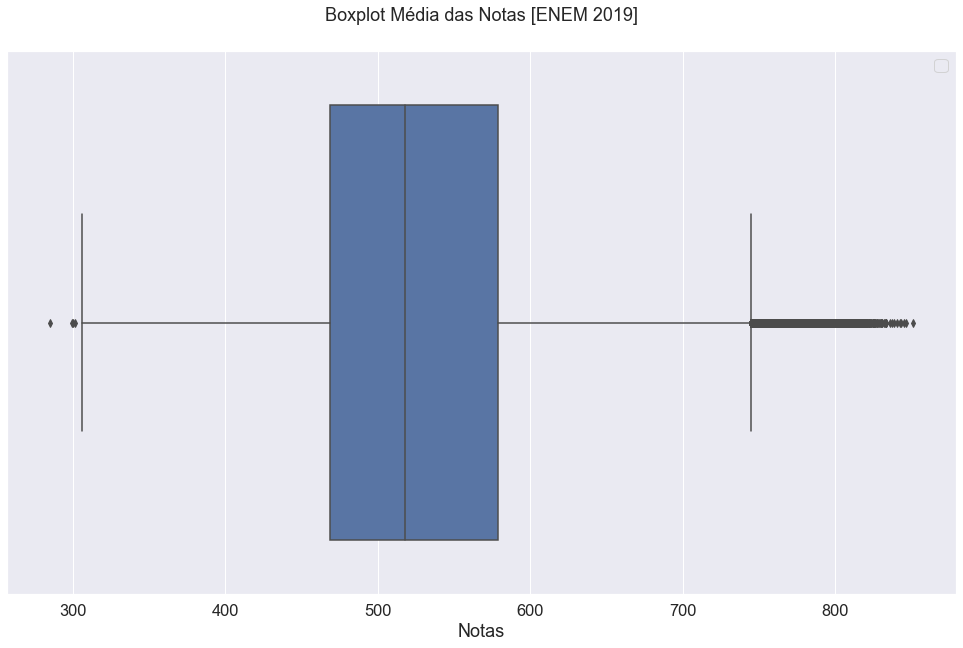

In [51]:
sns.boxplot(base_enem_notas.nota_media)

plt.xlabel('Notas')

plt.title("Boxplot Média das Notas [ENEM 2019]")
plt.legend();

Perceba que pelo boxplot, pessoas com menos de 300 pontos de média e mais que 750 já são visto como outliers, isto é, pessoas fora da curva, da forma boa e ruim.

Além disso conseguimos usar os valores dos quantis para gerar informações complementares:

In [52]:
base_enem_notas.nota_media.quantile([.25, .5, .75])

0.25   468.70
0.50   518.12
0.75   579.04
Name: nota_media, dtype: float64

Podemos dizer que 50% dos alunos no ENEM de 2019 tiveram uma nota entre 460 e 580.

Ou também que 75% dos inscritos tiveram uma nota menor que 580.

In [53]:
base_enem_notas.nota_media.quantile([.90])

0.90   639.62
Name: nota_media, dtype: float64

90% Dos alunos em 2019, tiveram uma nota média menor que 640.